<a href="https://colab.research.google.com/github/saket-20/SparkML_CaloriesBurnt/blob/main/SparkMLCaloriesBurnt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pyspark

     |████████████████████████████████| 281.3 MB 37 kB/s 
     |████████████████████████████████| 198 kB 51.6 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.0-py2.py3-none-any.whl size=281805912 sha256=66a4a2902e7c3c94ce12f08229a5c0d8e706bfffe7d312050e57e9af50dc9bed
  Stored in directory: /root/.cache/pip/wheels/0b/de/d2/9be5d59d7331c6c2a7c1b6d1a4f463ce107332b1ecd4e80718
Successfully built pyspark


In [3]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('data').getOrCreate()
caloriedf = spark.read.csv('exercise.csv',inferSchema=True,header=True)
caloriedf.show()

+--------+------+---+------+------+--------+----------+---------+--------+
| User_ID|Gender|Age|Height|Weight|Duration|Heart_Rate|Body_Temp|Calories|
+--------+------+---+------+------+--------+----------+---------+--------+
|14733363|  male| 68|   190|    94|      29|       105|     40.8|     231|
|14861698|female| 20|   166|    60|      14|        94|     40.3|      66|
|11179863|  male| 69|   179|    79|       5|        88|     38.7|      26|
|16180408|female| 34|   179|    71|      13|       100|     40.5|      71|
|17771927|female| 27|   154|    58|      10|        81|     39.8|      35|
|15130815|female| 36|   151|    50|      23|        96|     40.7|     123|
|19602372|female| 33|   158|    56|      22|        95|     40.5|     112|
|11117088|  male| 41|   175|    85|      25|       100|     40.7|     143|
|12132339|  male| 60|   186|    94|      21|        97|     40.4|     134|
|17964668|female| 26|   146|    51|      16|        90|     40.2|      72|
|13723164|female| 36|   1

In [4]:
from pyspark.ml.feature import StandardScaler

In [5]:
type(caloriedf)

pyspark.sql.dataframe.DataFrame

In [6]:
 caloriedf.printSchema()

root
 |-- User_ID: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Height: integer (nullable = true)
 |-- Weight: integer (nullable = true)
 |-- Duration: integer (nullable = true)
 |-- Heart_Rate: integer (nullable = true)
 |-- Body_Temp: double (nullable = true)
 |-- Calories: integer (nullable = true)



In [7]:
calorie_pd=caloriedf.toPandas()

In [8]:
calorie_pd

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190,94,29,105,40.8,231
1,14861698,female,20,166,60,14,94,40.3,66
2,11179863,male,69,179,79,5,88,38.7,26
3,16180408,female,34,179,71,13,100,40.5,71
4,17771927,female,27,154,58,10,81,39.8,35
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193,86,11,92,40.4,45
14996,17212577,female,27,165,65,6,85,39.2,23
14997,17271188,female,43,159,58,16,90,40.1,75
14998,18643037,male,78,193,97,2,84,38.3,11


In [9]:
import seaborn as sns

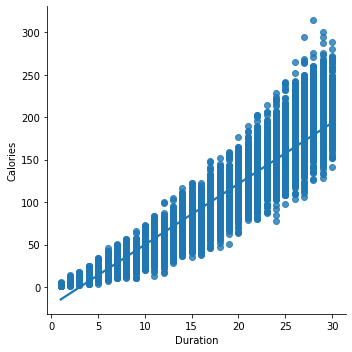

In [10]:
sns.lmplot(x="Duration",y="Calories",data=calorie_pd)

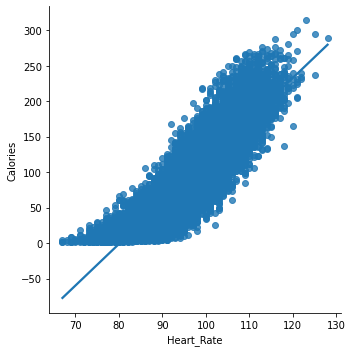

In [11]:
sns.lmplot(x="Heart_Rate",y="Calories",data=calorie_pd)

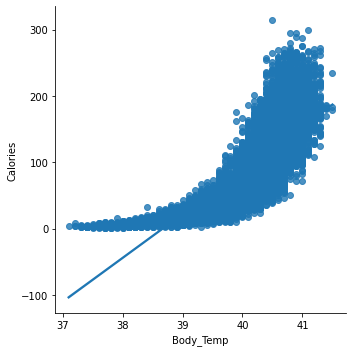

In [12]:
sns.lmplot(x="Body_Temp",y="Calories",data=calorie_pd)

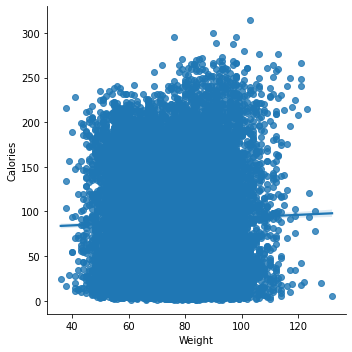

In [13]:
sns.lmplot(x="Weight",y="Calories",data=calorie_pd)

In [14]:
caloriedf=caloriedf.replace("male","0")
caloriedf=caloriedf.replace("female","1")
caloriedf.show()

+--------+------+---+------+------+--------+----------+---------+--------+
| User_ID|Gender|Age|Height|Weight|Duration|Heart_Rate|Body_Temp|Calories|
+--------+------+---+------+------+--------+----------+---------+--------+
|14733363|     0| 68|   190|    94|      29|       105|     40.8|     231|
|14861698|     1| 20|   166|    60|      14|        94|     40.3|      66|
|11179863|     0| 69|   179|    79|       5|        88|     38.7|      26|
|16180408|     1| 34|   179|    71|      13|       100|     40.5|      71|
|17771927|     1| 27|   154|    58|      10|        81|     39.8|      35|
|15130815|     1| 36|   151|    50|      23|        96|     40.7|     123|
|19602372|     1| 33|   158|    56|      22|        95|     40.5|     112|
|11117088|     0| 41|   175|    85|      25|       100|     40.7|     143|
|12132339|     0| 60|   186|    94|      21|        97|     40.4|     134|
|17964668|     1| 26|   146|    51|      16|        90|     40.2|      72|
|13723164|     1| 36|   1

In [15]:
from pyspark.sql.types import IntegerType,BooleanType,DateType

In [18]:
caloriedf=caloriedf.withColumn("Gender",caloriedf.Gender.cast(IntegerType()))
caloriedf.show()
caloriedf.printSchema()
schema1=caloriedf.schema

+--------+------+---+------+------+--------+----------+---------+--------+
| User_ID|Gender|Age|Height|Weight|Duration|Heart_Rate|Body_Temp|Calories|
+--------+------+---+------+------+--------+----------+---------+--------+
|14733363|     0| 68|   190|    94|      29|       105|     40.8|     231|
|14861698|     1| 20|   166|    60|      14|        94|     40.3|      66|
|11179863|     0| 69|   179|    79|       5|        88|     38.7|      26|
|16180408|     1| 34|   179|    71|      13|       100|     40.5|      71|
|17771927|     1| 27|   154|    58|      10|        81|     39.8|      35|
|15130815|     1| 36|   151|    50|      23|        96|     40.7|     123|
|19602372|     1| 33|   158|    56|      22|        95|     40.5|     112|
|11117088|     0| 41|   175|    85|      25|       100|     40.7|     143|
|12132339|     0| 60|   186|    94|      21|        97|     40.4|     134|
|17964668|     1| 26|   146|    51|      16|        90|     40.2|      72|
|13723164|     1| 36|   1

In [19]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

In [20]:
featureassembler=VectorAssembler(inputCols=["Gender","Age","Height","Weight","Duration","Heart_Rate","Body_Temp"],outputCol="Independent Features")

In [21]:
output=featureassembler.transform(caloriedf)

In [22]:
output.show()

+--------+------+---+------+------+--------+----------+---------+--------+--------------------+
| User_ID|Gender|Age|Height|Weight|Duration|Heart_Rate|Body_Temp|Calories|Independent Features|
+--------+------+---+------+------+--------+----------+---------+--------+--------------------+
|14733363|     0| 68|   190|    94|      29|       105|     40.8|     231|[0.0,68.0,190.0,9...|
|14861698|     1| 20|   166|    60|      14|        94|     40.3|      66|[1.0,20.0,166.0,6...|
|11179863|     0| 69|   179|    79|       5|        88|     38.7|      26|[0.0,69.0,179.0,7...|
|16180408|     1| 34|   179|    71|      13|       100|     40.5|      71|[1.0,34.0,179.0,7...|
|17771927|     1| 27|   154|    58|      10|        81|     39.8|      35|[1.0,27.0,154.0,5...|
|15130815|     1| 36|   151|    50|      23|        96|     40.7|     123|[1.0,36.0,151.0,5...|
|19602372|     1| 33|   158|    56|      22|        95|     40.5|     112|[1.0,33.0,158.0,5...|
|11117088|     0| 41|   175|    85|     

In [23]:
output.select("Independent Features").show()

+--------------------+
|Independent Features|
+--------------------+
|[0.0,68.0,190.0,9...|
|[1.0,20.0,166.0,6...|
|[0.0,69.0,179.0,7...|
|[1.0,34.0,179.0,7...|
|[1.0,27.0,154.0,5...|
|[1.0,36.0,151.0,5...|
|[1.0,33.0,158.0,5...|
|[0.0,41.0,175.0,8...|
|[0.0,60.0,186.0,9...|
|[1.0,26.0,146.0,5...|
|[1.0,36.0,177.0,7...|
|[1.0,21.0,157.0,5...|
|[0.0,66.0,171.0,7...|
|[1.0,32.0,157.0,5...|
|[0.0,53.0,182.0,8...|
|[1.0,39.0,156.0,6...|
|[0.0,39.0,182.0,8...|
|[0.0,46.0,169.0,6...|
|[1.0,27.0,171.0,6...|
|[0.0,50.0,188.0,8...|
+--------------------+
only showing top 20 rows



In [24]:
output.columns

['User_ID',
 'Gender',
 'Age',
 'Height',
 'Weight',
 'Duration',
 'Heart_Rate',
 'Body_Temp',
 'Calories',
 'Independent Features']

In [25]:
finalized_data=output.select("Independent Features","Calories")

In [26]:

finalized_data.show()

+--------------------+--------+
|Independent Features|Calories|
+--------------------+--------+
|[0.0,68.0,190.0,9...|     231|
|[1.0,20.0,166.0,6...|      66|
|[0.0,69.0,179.0,7...|      26|
|[1.0,34.0,179.0,7...|      71|
|[1.0,27.0,154.0,5...|      35|
|[1.0,36.0,151.0,5...|     123|
|[1.0,33.0,158.0,5...|     112|
|[0.0,41.0,175.0,8...|     143|
|[0.0,60.0,186.0,9...|     134|
|[1.0,26.0,146.0,5...|      72|
|[1.0,36.0,177.0,7...|       3|
|[1.0,21.0,157.0,5...|      92|
|[0.0,66.0,171.0,7...|      58|
|[1.0,32.0,157.0,5...|      88|
|[0.0,53.0,182.0,8...|       7|
|[1.0,39.0,156.0,6...|     170|
|[0.0,39.0,182.0,8...|      11|
|[0.0,46.0,169.0,6...|      43|
|[1.0,27.0,171.0,6...|      15|
|[0.0,50.0,188.0,8...|      74|
+--------------------+--------+
only showing top 20 rows



In [27]:
train_data,test_data=finalized_data.randomSplit([0.75,0.25])

In [28]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator

In [29]:
regressor=LinearRegression(featuresCol='Independent Features', labelCol='Calories')
regressor=regressor.fit(train_data)

In [30]:
regressor.coefficients

DenseVector([1.4179, 0.4972, -0.1825, 0.3049, 6.6474, 1.9799, -16.959])

In [31]:
regressor.intercept

462.98394994213777

In [32]:
pred_results=regressor.evaluate(test_data)

In [33]:
pred_results.predictions.show(40)

/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:127: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


+--------------------+--------+-------------------+
|Independent Features|Calories|         prediction|
+--------------------+--------+-------------------+
|[0.0,20.0,167.0,6...|      35|  38.75702325659381|
|[0.0,20.0,168.0,6...|      67|  80.62172812219279|
|[0.0,20.0,169.0,7...|      87| 114.87811224258292|
|[0.0,20.0,169.0,7...|      13| 15.820132986527199|
|[0.0,20.0,170.0,7...|     185|  186.7324291015102|
|[0.0,20.0,171.0,6...|      52|  60.45777488329594|
|[0.0,20.0,172.0,7...|      77|  95.39757796744698|
|[0.0,20.0,172.0,7...|      76|  93.43527391080283|
|[0.0,20.0,172.0,7...|      27|   31.8343729530813|
|[0.0,20.0,173.0,6...|      10|-2.1714036697510437|
|[0.0,20.0,173.0,7...|       6| -6.331763335314463|
|[0.0,20.0,173.0,7...|      31|  31.51233571198793|
|[0.0,20.0,174.0,7...|      73|  90.38593555432021|
|[0.0,20.0,174.0,7...|     163|  172.0449616215555|
|[0.0,20.0,176.0,7...|      67|  77.61997402668925|
|[0.0,20.0,178.0,7...|      47| 55.395482342540504|
|[0.0,20.0,1

In [34]:

from pyspark.ml.regression import RandomForestRegressor

In [35]:
randomforestregressor=RandomForestRegressor(featuresCol='Independent Features', labelCol='Calories')
randomforestregressor=randomforestregressor.fit(train_data)

In [36]:
forestpred=randomforestregressor.transform(test_data)

In [37]:
forestpred.show(40)

+--------------------+--------+------------------+
|Independent Features|Calories|        prediction|
+--------------------+--------+------------------+
|[0.0,20.0,167.0,6...|      35| 56.83269435974432|
|[0.0,20.0,168.0,6...|      67| 83.19164679951238|
|[0.0,20.0,169.0,7...|      87|111.30080430521271|
|[0.0,20.0,169.0,7...|      13|15.122008209268781|
|[0.0,20.0,170.0,7...|     185|192.06346649897174|
|[0.0,20.0,171.0,6...|      52| 70.42592385656957|
|[0.0,20.0,172.0,7...|      77|104.18218130271855|
|[0.0,20.0,172.0,7...|      76|  82.8902124711122|
|[0.0,20.0,172.0,7...|      27| 39.47003892243929|
|[0.0,20.0,173.0,6...|      10|15.874180749273496|
|[0.0,20.0,173.0,7...|       6|10.534176607062353|
|[0.0,20.0,173.0,7...|      31| 44.84843892817629|
|[0.0,20.0,174.0,7...|      73| 86.91388636521819|
|[0.0,20.0,174.0,7...|     163|179.01324070481132|
|[0.0,20.0,176.0,7...|      67| 85.37456380279406|
|[0.0,20.0,178.0,7...|      47| 60.66531739535215|
|[0.0,20.0,178.0,8...|      69|

In [38]:
evaluator = RegressionEvaluator(
    labelCol="Calories", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(forestpred)

In [39]:
print(rmse)

9.7333660177579


In [40]:
from pyspark.ml.regression import GBTRegressor

In [41]:
gbt=GBTRegressor(featuresCol='Independent Features', labelCol='Calories')

In [42]:
gbt=gbt.fit(train_data)

In [43]:
gbtpred=gbt.transform(test_data)

In [44]:
gbtpred.show()

+--------------------+--------+------------------+
|Independent Features|Calories|        prediction|
+--------------------+--------+------------------+
|[0.0,20.0,167.0,6...|      35| 38.64360050660577|
|[0.0,20.0,168.0,6...|      67| 75.98851858719823|
|[0.0,20.0,169.0,7...|      87| 94.56050205477713|
|[0.0,20.0,169.0,7...|      13|17.471556421903703|
|[0.0,20.0,170.0,7...|     185|193.37338106054773|
|[0.0,20.0,171.0,6...|      52|  53.7662004839616|
|[0.0,20.0,172.0,7...|      77| 77.53369255629357|
|[0.0,20.0,172.0,7...|      76| 75.98851858719823|
|[0.0,20.0,172.0,7...|      27|22.178689488647795|
|[0.0,20.0,173.0,6...|      10| 7.309334926006258|
|[0.0,20.0,173.0,7...|       6| 6.106479278546047|
|[0.0,20.0,173.0,7...|      31| 32.16461882214507|
|[0.0,20.0,174.0,7...|      73| 74.98745714539551|
|[0.0,20.0,174.0,7...|     163|183.09007696616635|
|[0.0,20.0,176.0,7...|      67| 73.64290709179811|
|[0.0,20.0,178.0,7...|      47|  53.7662004839616|
|[0.0,20.0,178.0,8...|      69|

In [45]:
evaluator = RegressionEvaluator(
    labelCol="Calories", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(gbtpred)

In [46]:
rmse

7.661184736153571

In [47]:
print(type(gbt))

<class 'pyspark.ml.regression.GBTRegressionModel'>


In [48]:
from pyspark.ml.regression import GBTRegressionModel

In [49]:
gbt.save("modelfilefinal")

In [50]:
persistedModel = GBTRegressionModel.load("modelfilefinal")

In [72]:
data=[[11117088,1,20,166,60,14,94,40.3,0]]
rdd = spark.sparkContext.parallelize(data)

In [73]:

df = spark.createDataFrame(rdd,schema1)

In [74]:
df.show()

+--------+------+---+------+------+--------+----------+---------+--------+
| User_ID|Gender|Age|Height|Weight|Duration|Heart_Rate|Body_Temp|Calories|
+--------+------+---+------+------+--------+----------+---------+--------+
|11117088|     1| 20|   166|    60|      14|        94|     40.3|       0|
+--------+------+---+------+------+--------+----------+---------+--------+



In [75]:
df1=featureassembler.transform(df)

In [76]:
df1.show()

+--------+------+---+------+------+--------+----------+---------+--------+--------------------+
| User_ID|Gender|Age|Height|Weight|Duration|Heart_Rate|Body_Temp|Calories|Independent Features|
+--------+------+---+------+------+--------+----------+---------+--------+--------------------+
|11117088|     1| 20|   166|    60|      14|        94|     40.3|       0|[1.0,20.0,166.0,6...|
+--------+------+---+------+------+--------+----------+---------+--------+--------------------+



In [77]:
persistedModel.transform(df1).show()

+--------+------+---+------+------+--------+----------+---------+--------+--------------------+-----------------+
| User_ID|Gender|Age|Height|Weight|Duration|Heart_Rate|Body_Temp|Calories|Independent Features|       prediction|
+--------+------+---+------+------+--------+----------+---------+--------+--------------------+-----------------+
|11117088|     1| 20|   166|    60|      14|        94|     40.3|       0|[1.0,20.0,166.0,6...|67.11743156442007|
+--------+------+---+------+------+--------+----------+---------+--------+--------------------+-----------------+



In [78]:
persistedModel

GBTRegressionModel: uid=GBTRegressor_7371f8fff203, numTrees=20, numFeatures=7

In [81]:
gbtpred_pd=gbtpred.toPandas()

In [87]:
gbtpred_pd['prediction'].min()

-0.5865514406717729

In [89]:
gbtpred_pd[gbtpred_pd["prediction"]<0]

,Independent Features,Calories,prediction
63,"[0.0, 21.0, 175.0, 78.0, 2.0, 81.0, 38.3]",3,-0.451252
195,"[0.0, 23.0, 175.0, 82.0, 2.0, 92.0, 38.4]",7,-0.586551
205,"[0.0, 23.0, 182.0, 82.0, 2.0, 79.0, 38.2]",3,-0.496297
210,"[0.0, 23.0, 183.0, 81.0, 2.0, 76.0, 38.0]",2,-0.369650
239,"[0.0, 24.0, 160.0, 61.0, 1.0, 77.0, 37.7]",1,-0.484252
275,"[0.0, 24.0, 189.0, 91.0, 1.0, 78.0, 37.7]",2,-0.140069


In [92]:
caloriedf.printSchema()

root
 |-- User_ID: integer (nullable = true)
 |-- Gender: integer (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Height: integer (nullable = true)
 |-- Weight: integer (nullable = true)
 |-- Duration: integer (nullable = true)
 |-- Heart_Rate: integer (nullable = true)
 |-- Body_Temp: double (nullable = true)
 |-- Calories: integer (nullable = true)

